# Data Preparation for Test-Time Scaling

This notebook covers:
1. Data loading
2. Initial exploration
3. Data cleaning
4. Train/test splitting
5. Initial scaling for baseline

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from utils.preprocessing import ScalingManager, load_and_preprocess_data, handle_missing_values
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading

Load your dataset and perform initial preprocessing.

In [3]:
# Import necessary functions
from sklearn.datasets import fetch_california_housing, make_classification

# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='target')

# Display basic information about the dataset
print("Dataset loaded: California Housing")
print("Features:", housing.feature_names)
print("Target: Median house value")

# For demonstration, let's create some synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='target')

Dataset loaded: California Housing
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value


## 2. Initial Data Exploration

Dataset shape: (1000, 20)

Feature statistics:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.059679    -0.382222     0.554395    -0.538549     0.029665   
std       2.531984     2.507247     2.120906     2.278681     1.016464   
min      -9.628862    -9.479867    -6.017109    -8.233342    -2.976032   
25%      -1.837091    -2.123342    -0.805943    -1.993995    -0.676109   
50%       0.038068    -0.446630     0.538348    -0.496739    -0.006333   
75%       1.709011     1.357026     1.915909     0.963986     0.706949   
max       9.541978     7.209773     7.499632     6.511036     4.479084   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.359628     0.461507     0.025848     0.395558    -0.764689   
std       2.118717     2.528174     5.484761     2.430171     2.

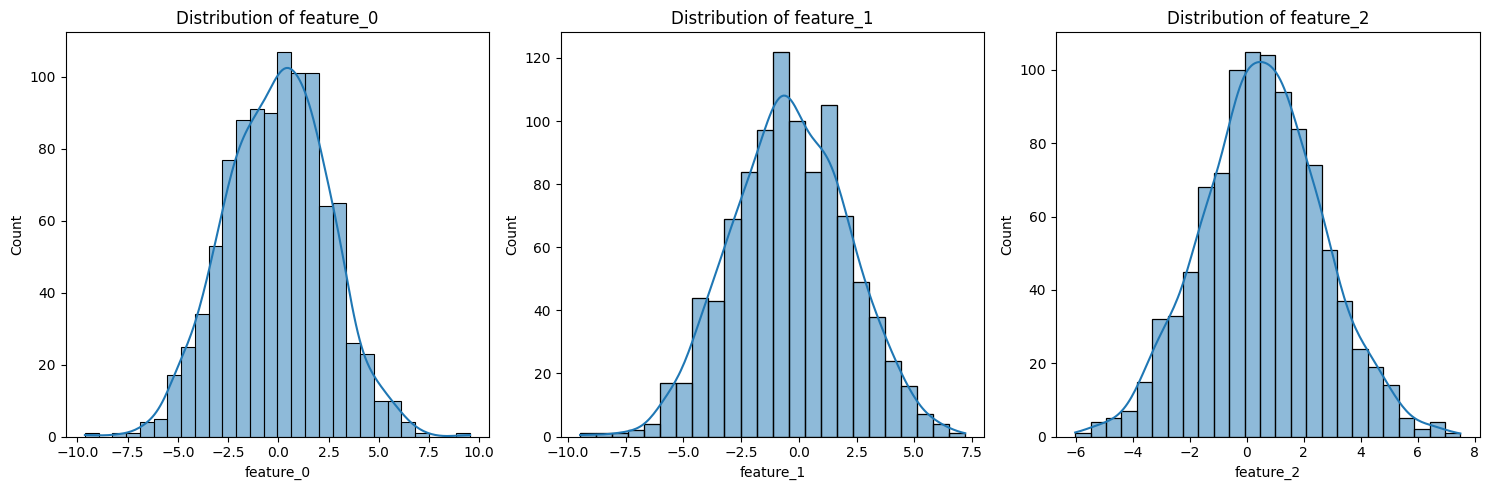

In [4]:
# Basic statistics
print("Dataset shape:", X.shape)
print("\nFeature statistics:")
print(X.describe())

# Distribution plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(X.columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

## 3. Data Cleaning

In [5]:
# Handle missing values if any
X = handle_missing_values(X, strategy='mean')

# Check for and remove any duplicates
X = X.drop_duplicates()
y = y[X.index]

## 4. Train/Test Split

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 20)
Test set shape: (200, 20)


## 5. Initial Scaling (Baseline)

In [7]:
# Initialize scaling manager
scaling_manager = ScalingManager()

# Fit and transform with standard scaler (baseline)
scaling_manager.fit_scaler(X_train, 'standard')
X_train_scaled = scaling_manager.transform(X_train, 'standard')
X_test_scaled = scaling_manager.transform(X_test, 'standard')

# Save processed data
np.save('../data/processed/X_train.npy', X_train_scaled)
np.save('../data/processed/X_test.npy', X_test_scaled)
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/y_test.npy', y_test)

## 6. Visualization of Scaled Data

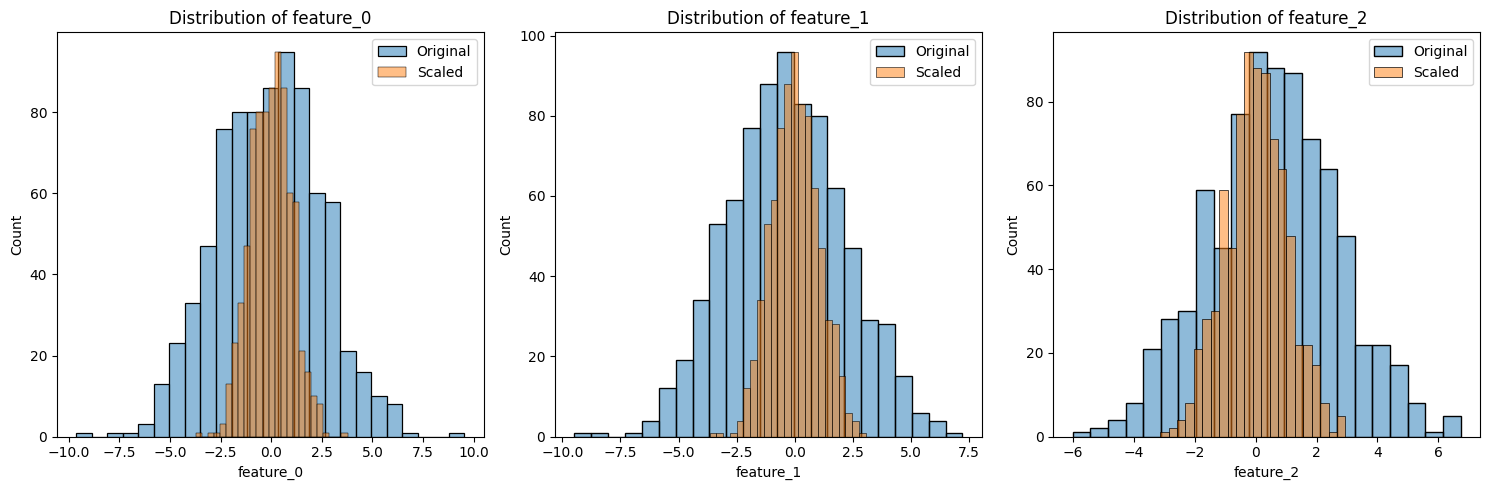

In [8]:
# Compare original vs scaled distributions for a few features
plt.figure(figsize=(15, 5))
for i, col in enumerate(X_train.columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_train[col], label='Original', alpha=0.5)
    sns.histplot(X_train_scaled[:, i], label='Scaled', alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()